# Kr DD profiles


Dev Note book to create a map - a la IC

J. A Hernando, C. Herves

March 2024

In [11]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [12]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [54]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana     as krana

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit

#import invisible_cities.io.dst_io as dio

In [35]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Sat Mar  2 10:19:25 2024


In [55]:
#import os
import re
import glob

from collections import namedtuple

## Generate experiment

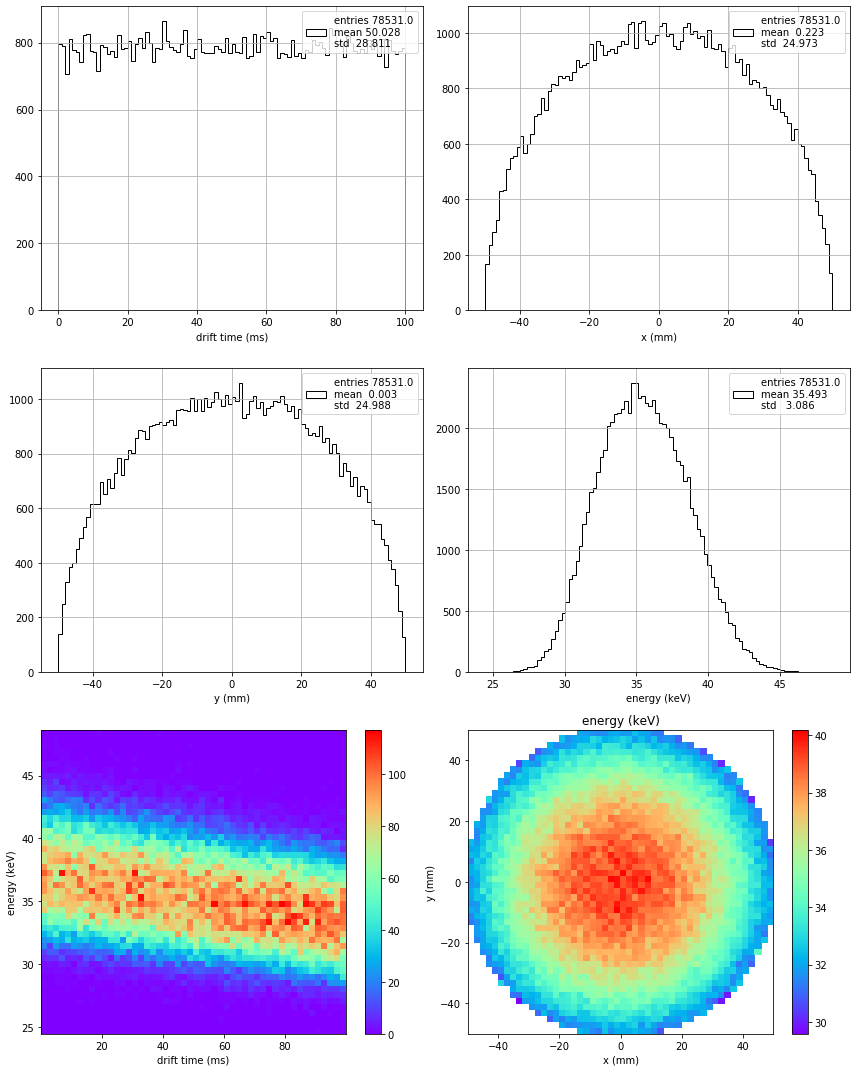

In [154]:
# Generate a Toy Kr sample
# Data can be displaced respect the origin

df = krana.generate_kr_toy(beta = 0.2)
krana.plot_data(df, 50)

## Create Map

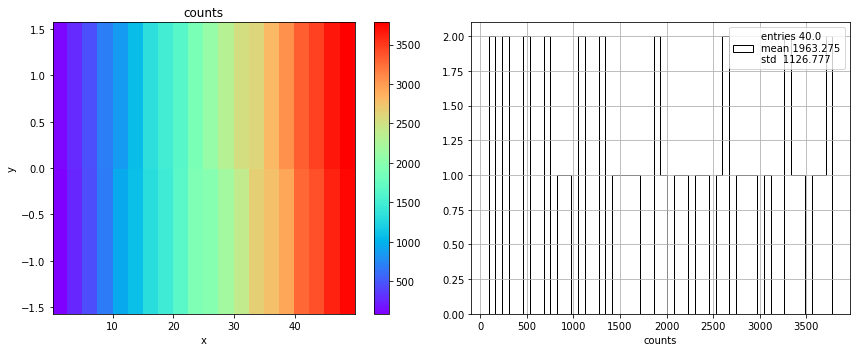

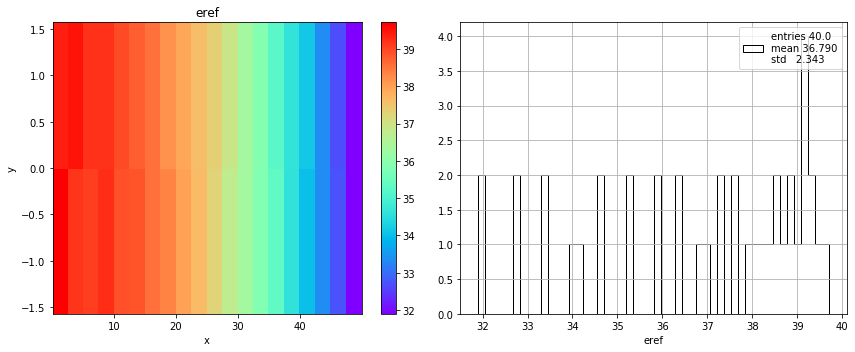

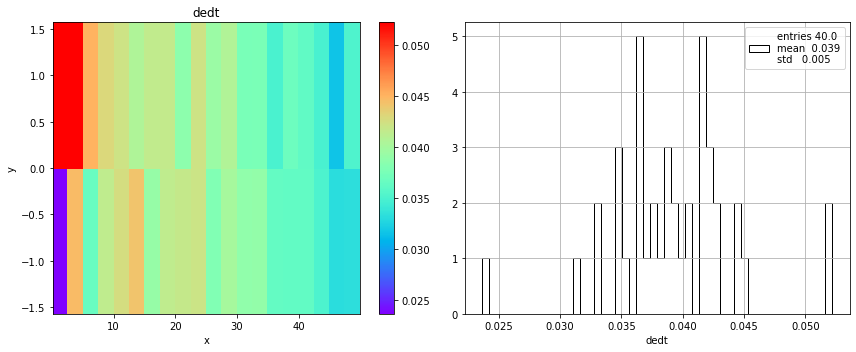

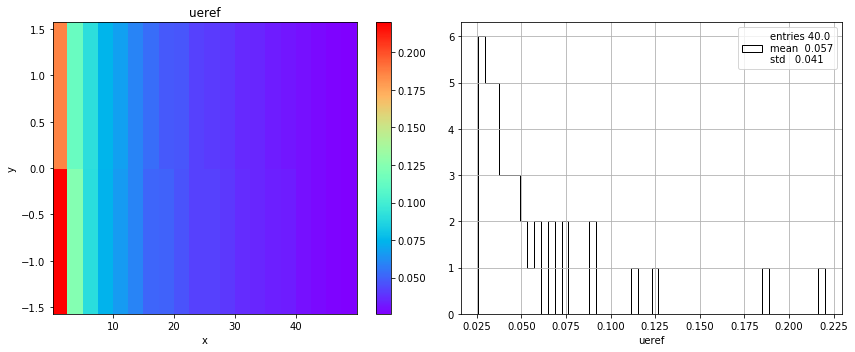

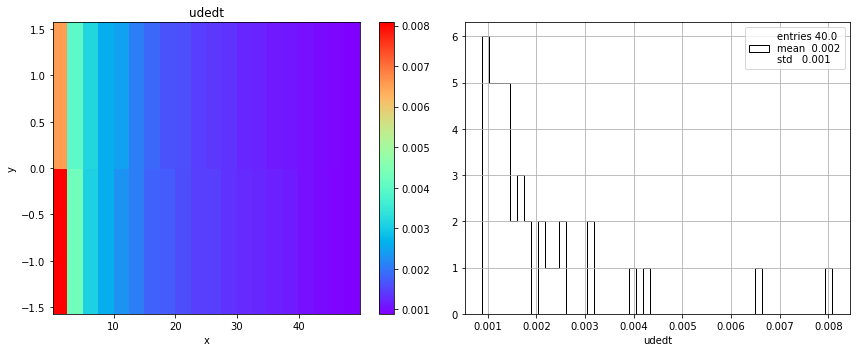

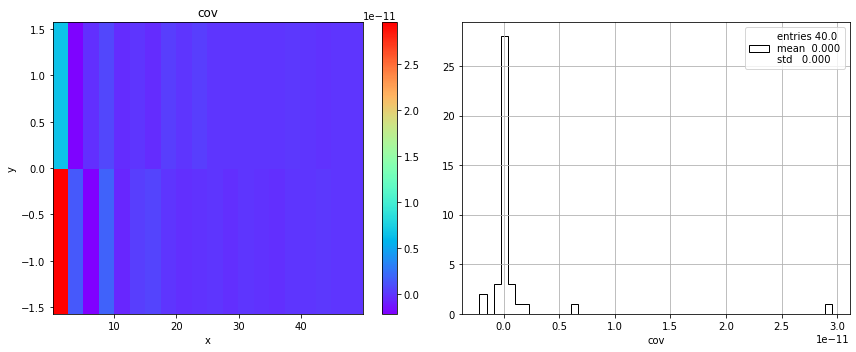

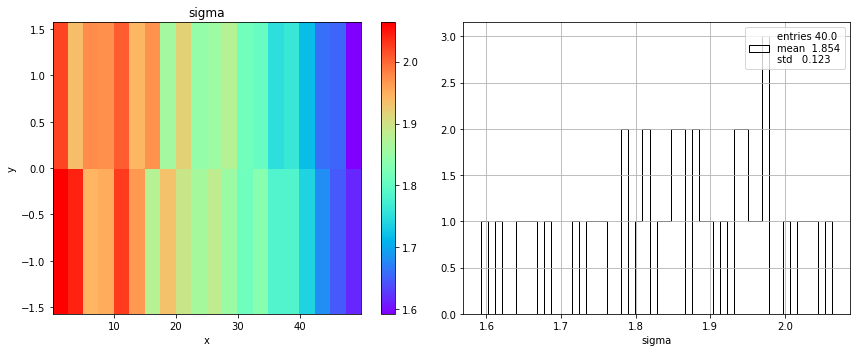

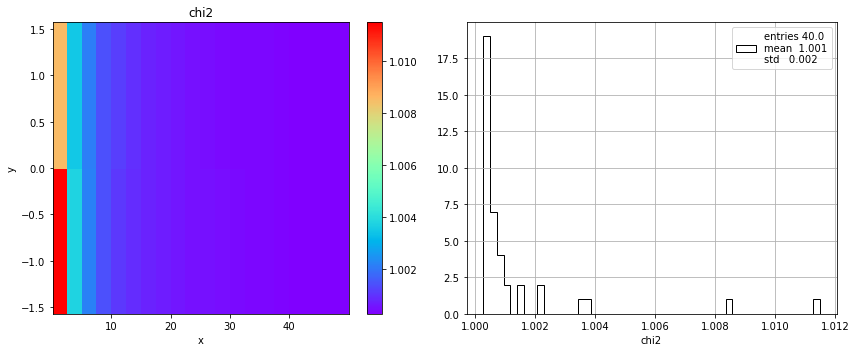

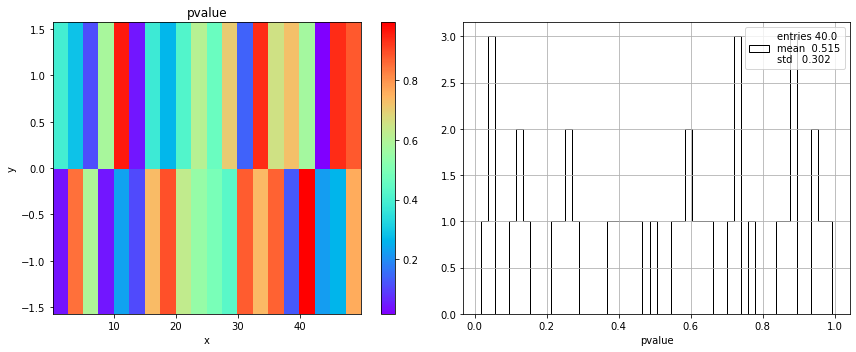

In [174]:
coors      = df.r, df.phi
bins       = (20, 2)
energy     = df.energy
dtime      = df.dtime
counts_min = 10
krmap, residuals = krana.krmap(coors, dtime, energy, 
                               bins = bins, counts_min = counts_min)
prof.plot_profile(krmap, stats = ('counts', 'eref', 'dedt', 'ueref', 'udedt', 'cov', 'sigma', 'chi2', 'pvalue'));

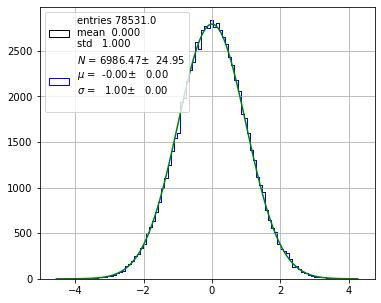

In [175]:
pltext.canvas(1, 1);
xsel = ~np.isnan(residuals)
pltext.hist(residuals[xsel], 100);
pltext.hfit(residuals[xsel], 100, fun = 'gaus');

## LT Kr Map

In [178]:
max(df.r)

49.99994423830175

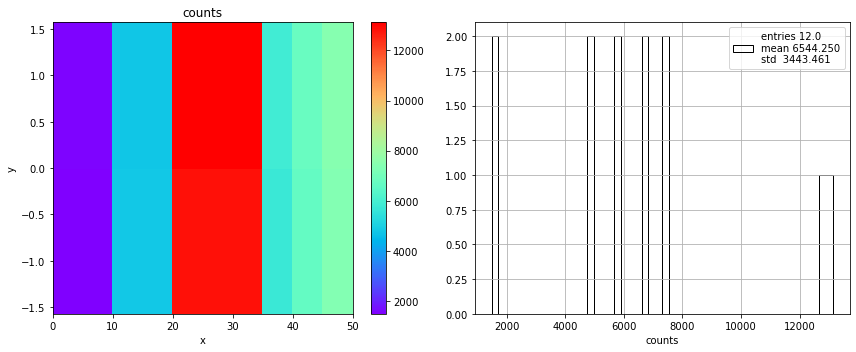

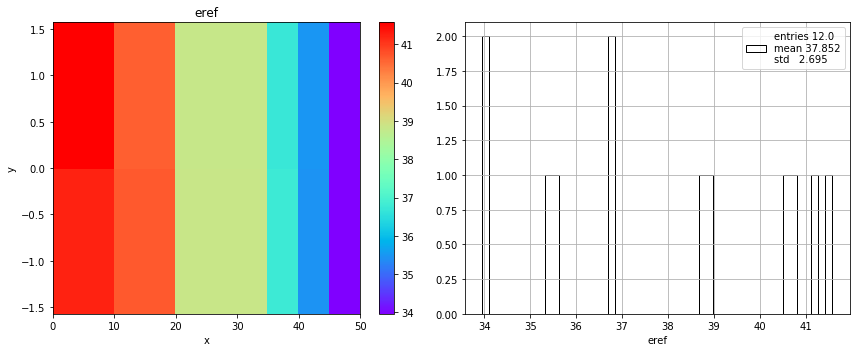

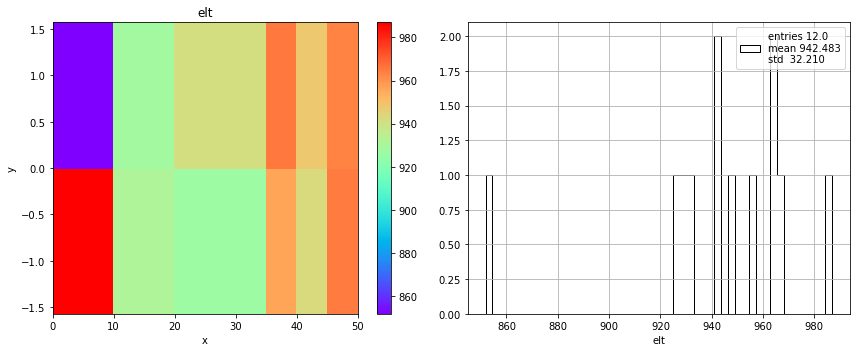

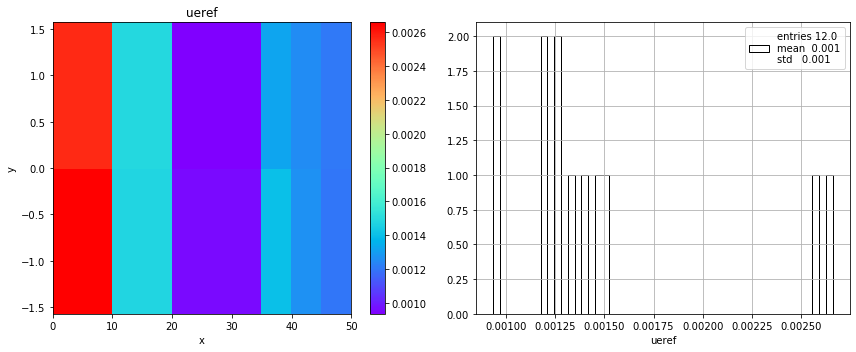

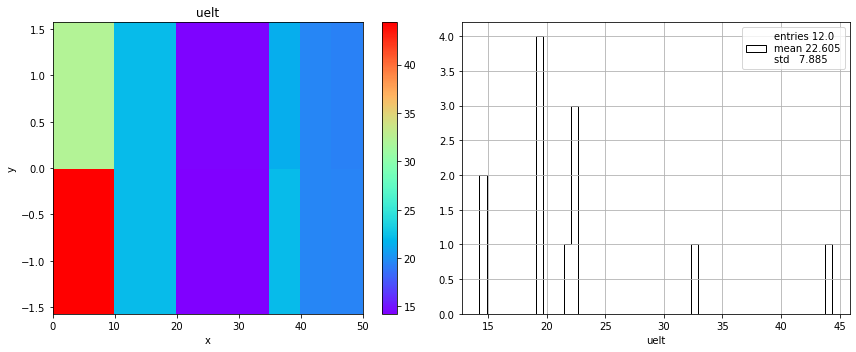

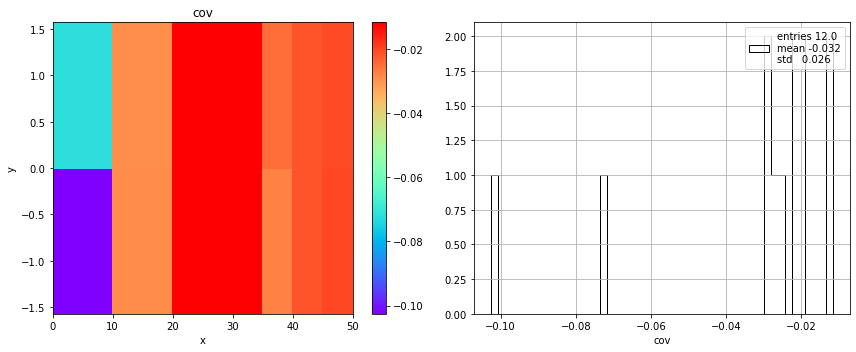

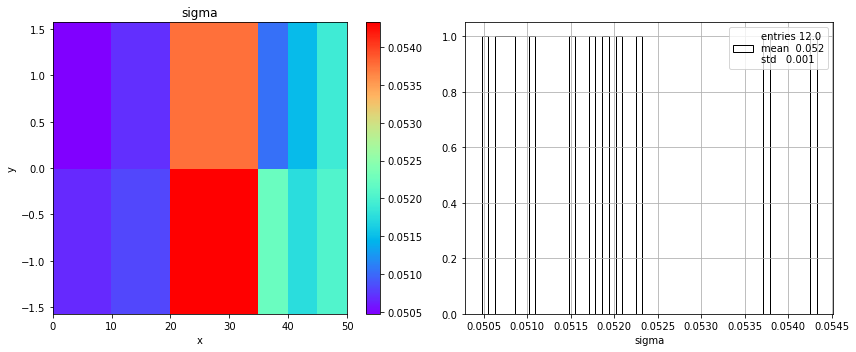

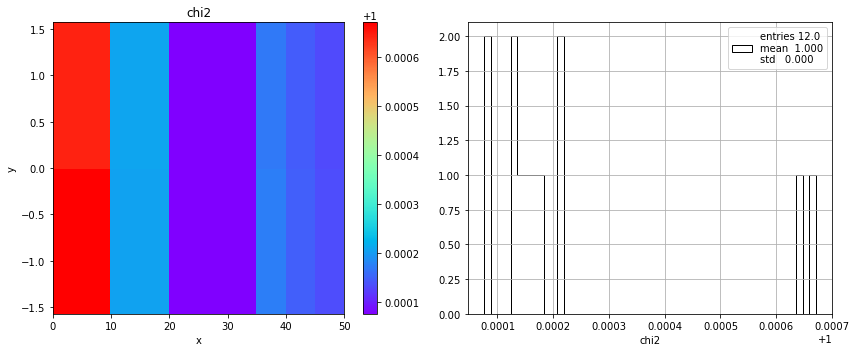

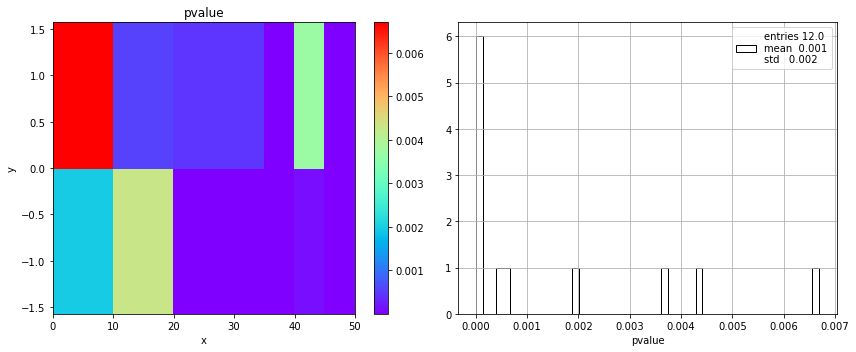

In [184]:
coors      = df.r, df.phi
bins       = ([0., 10, 20, 35, 40, 45, 50], 2)
energy     = df.energy
dtime      = df.dtime
counts_min = 10
krmap, residuals = krana.eltkrmap(coors, dtime, energy, 
                                  bins = bins, counts_min = counts_min)
prof.plot_profile(krmap, stats = ('counts', 'eref', 'elt', 'ueref', 'uelt', 'cov', 'sigma', 'chi2', 'pvalue'));


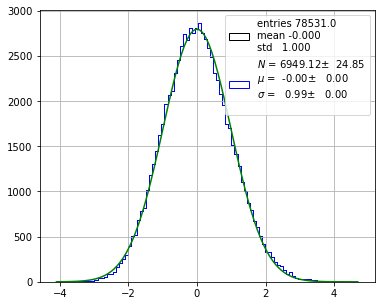

In [185]:
pltext.canvas(1, 1);
xsel = ~np.isnan(residuals)
pltext.hist(residuals[xsel], 100);
pltext.hfit(residuals[xsel], 100, fun = 'gaus');

## Apply the correction

In [36]:
corenergy  = krana.krmap_scale(coors, dtime, energy, krmap, scale = 41.5)

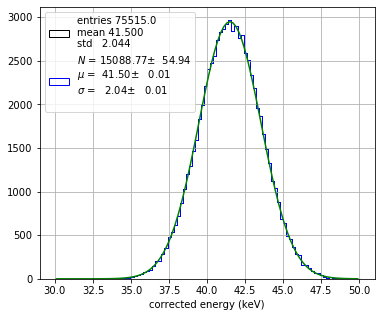

In [37]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100, (30., 50.));
pltext.hfit(corenergy, 100, fun = 'gaus', range = (30., 50.));
plt.xlabel('corrected energy (keV)');

### Validate correction

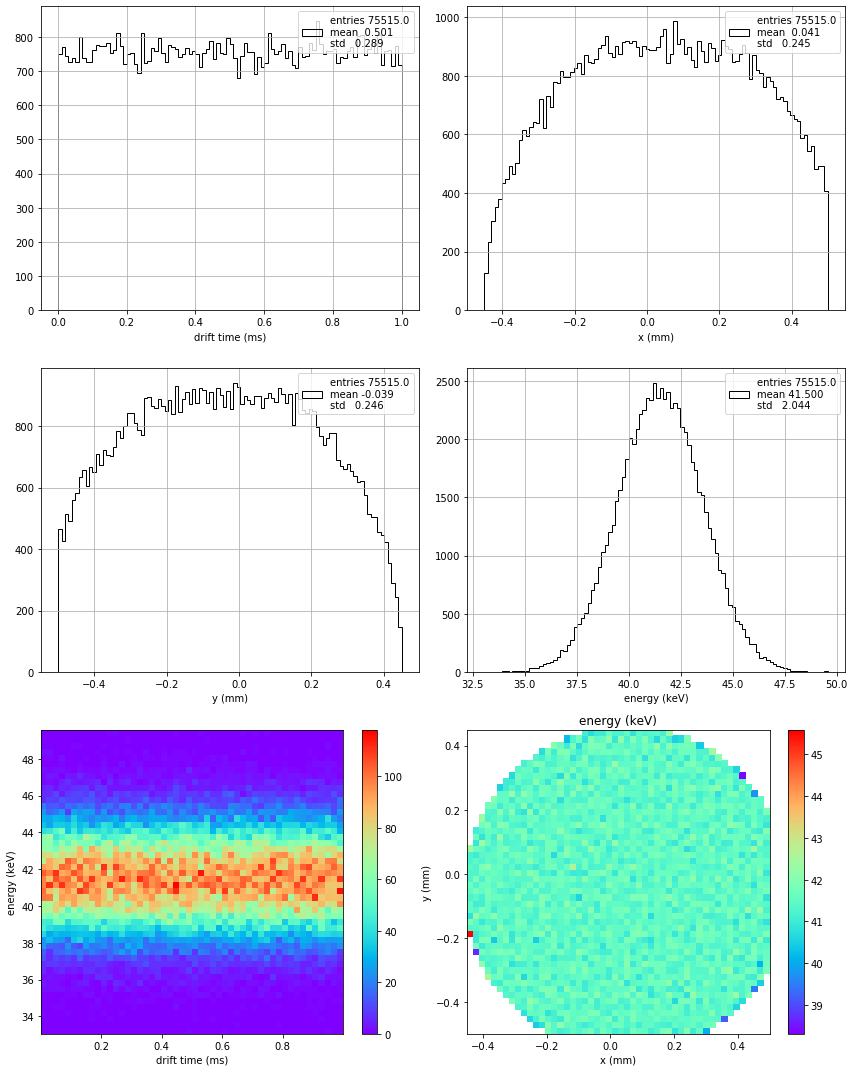

In [38]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
xsel = ut.in_range(corenergy, (30, 50))
krana.plot_data(xdf[xsel], 50)

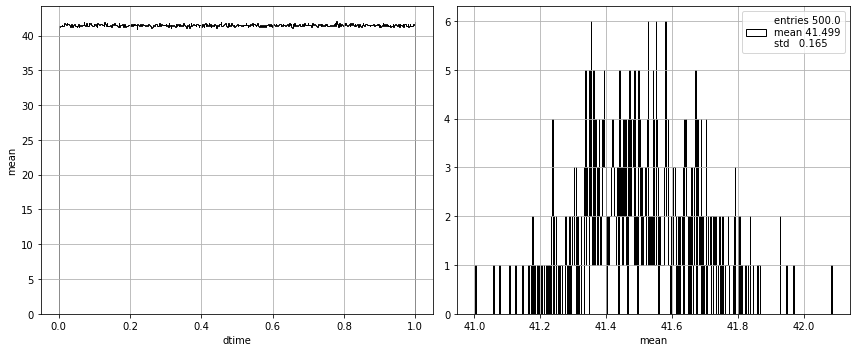

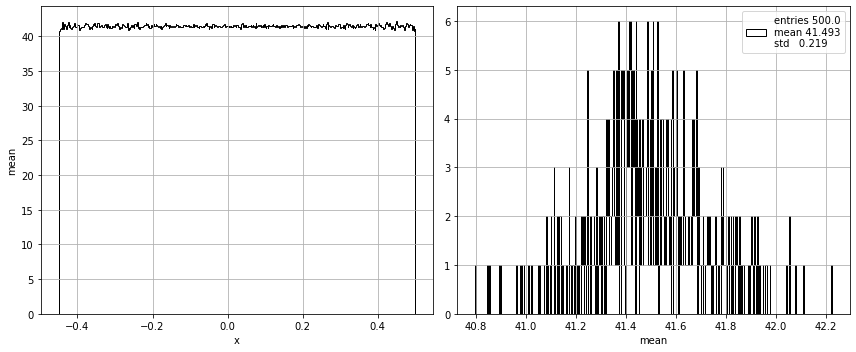

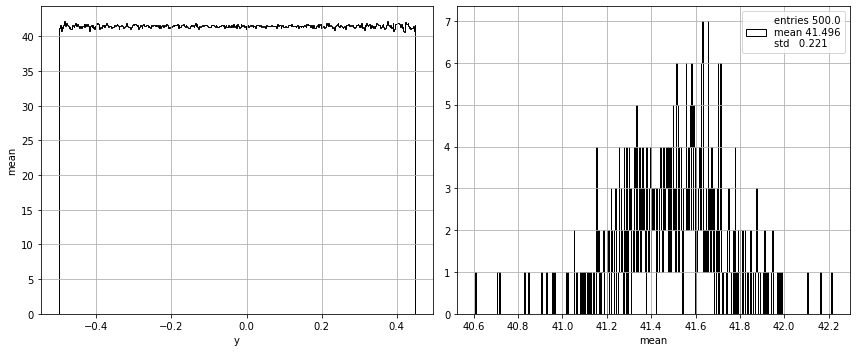

In [39]:
krana.plot_xydt_energy_profiles(xdf[xsel], nbins = 500)

## Test save/load the krmap

In [40]:
krana.save(krmap, 'krmap', 'test.h5')

In [41]:
kk = krana.load('krmap', 'test.h5')

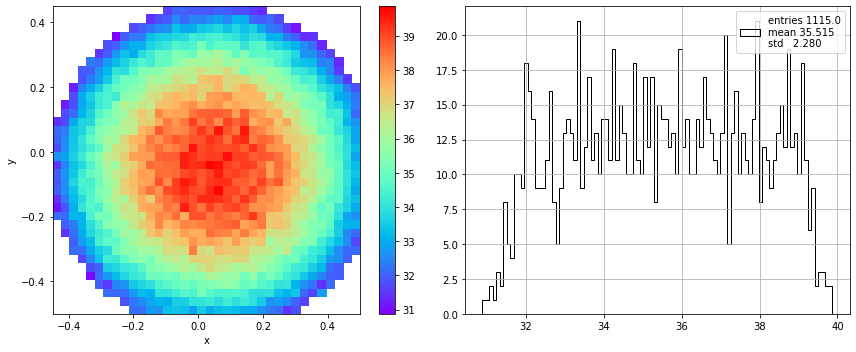

In [42]:
krana.plot_xyvar(krmap.eref, krmap.bin_edges, mask = krmap.success)